# Author prediction using RNNs

In this notebook, you will prepare a dataset to predict authorship of the Federalist Papers using Recurrent Neural Networks (RNNs).

## Federalist Papers

The Federalist Papers are a collection of 85 articles and essays written by Alexander Hamilton, James Madison, and John Jay under the pseudonym "Publius". They were published in 1787 and 1788 to promote the ratification of the United States Constitution. The authors of the Federalist Papers wanted to remain anonymous, so they used the pseudonym "Publius". The articles were published in two newspapers, the New York Packet and the Independent Journal. The Federalist Papers are considered important works of American political thought and are still widely read today.

## Additional information

- [Federalist Papers](https://en.wikipedia.org/wiki/The_Federalist_Papers)
- [Federalist Papers dataset](https://www.kaggle.com/datasets/tobyanderson/federalist-papers)
- [LOC Research Guide](https://guides.loc.gov/federalist-papers/full-text)

## Objectives (a)

- Task 1: Design your dataset to predict the author of a text using RNNs.
- Task 2: Explain the methodology of your dataset creation.
- Task 3: Establish a baseline model using Machine Learning algorithms (SVM, Random Forest, etc.).
  
## Objectives (b)

- Task 4: Train a RNN model to predict the author of a text.
- Task 5: Evaluate the performance of your model.
- Task 6: Explain your model architecture, hyperparameters, and the results of your model.

## Task 1: Dataset Creation

### Dataset description

Use the below code to scrape the Library of Congress research guide for the Federalist Papers. You need to pip install the following for the below code to work:

- `pip install beautifulsoup4`
- `pip install requests`
- `pip install pandas`

In [77]:
import pandas as pd
from io import StringIO
from bs4 import BeautifulSoup as bs
import requests

url = 'https://guides.loc.gov/federalist-papers/full-text'

html = requests.get(url).text
soup = bs(html, 'html.parser')

# convert the html table to a pandas dataframe
table = soup.find('table')

# List of Federalist Papers
meta_df = pd.read_html(StringIO(str(table)), parse_dates=True)[0]

### Dataset datatypes

In [78]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No.          85 non-null     float64
 1   Title        85 non-null     object 
 2   Author       85 non-null     object 
 3   Publication  85 non-null     object 
 4   Date         85 non-null     object 
dtypes: float64(1), object(4)
memory usage: 3.4+ KB


In [79]:
meta_df.head()

,No.,Title,Author,Publication,Date
0,1.0,General Introduction,Hamilton,For the Independent Journal,--
1,2.0,Concerning Dangers from Foreign Force and Infl...,Jay,For the Independent Journal,--
2,3.0,The Same Subject Continued: Concerning Dangers...,Jay,For the Independent Journal,--
3,4.0,The Same Subject Continued: Concerning Dangers...,Jay,For the Independent Journal,--
4,5.0,The Same Subject Continued: Concerning Dangers...,Jay,For the Independent Journal,--


### Autorship counts

Plot the count the number of papers written by each author. We want to create a machine learning dataset that consists of a train, validation, and test set. We will use the train set to train the model, the validation set to tune the hyperparameters, and the test set to evaluate the model.

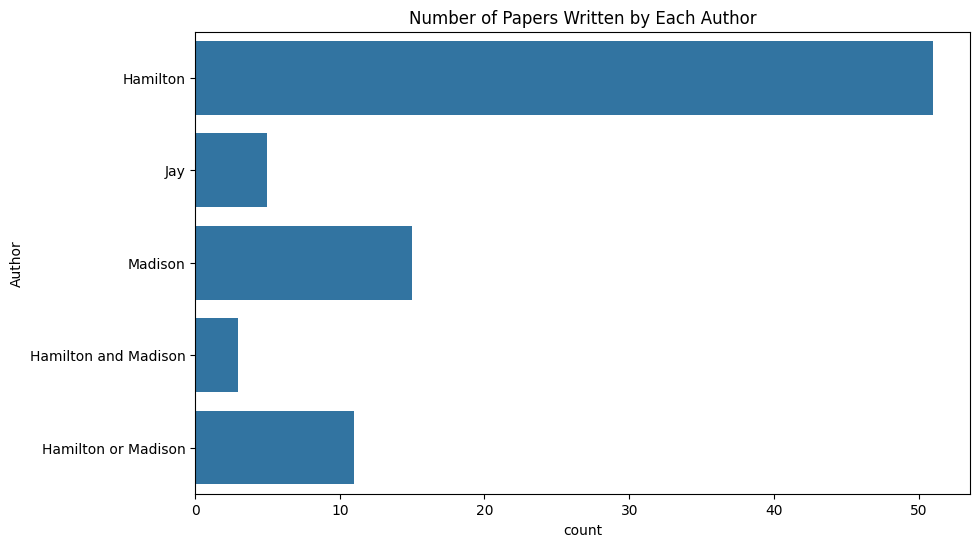

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the number of papers written by each author
plt.figure(figsize=(10, 6))
sns.countplot(y='Author', data=meta_df)
plt.title('Number of Papers Written by Each Author')
plt.show()

Based on the data, answer the following questions:

- How many papers were written by each author?
- How should you construct your dataset? Explain your reasoning.

### Contested authorship

In [81]:
# disputed papers
disputed_papers = meta_df[meta_df['Author'] == 'Hamilton or Madison']
contested_authorship = disputed_papers['No.'].values
print(f'Contested authorship of papers: {contested_authorship}')
print(f'Total number of disputed papers: {len(disputed_papers)}')

Contested authorship of papers: [49. 50. 51. 52. 53. 54. 55. 56. 57. 62. 63.]
Total number of disputed papers: 11


### Load the Federalist Papers corpus

The following code loads the Federalist Papers corpus. The papers have been preprocessed to aid your analysis of the authorship of the papers.

In [82]:
corpus = pd.read_pickle('../datasets/Federalist_Papers/fp_corpus.pkl')
corpus.head()

,text,paper_id,target,sentences,sentence_length,sentence_index,total_sentences
0,Method of Guarding Against the Encroachments o...,49,dispt,Method of Guarding Against the Encroachments o...,25,0,63
0,Method of Guarding Against the Encroachments o...,49,dispt,"Tuesday, February 5, 1788.",4,1,63
0,Method of Guarding Against the Encroachments o...,49,dispt,Author: Alexander Hamilton or James Madison,6,2,63
0,Method of Guarding Against the Encroachments o...,49,dispt,To the People of the State of New York:,9,3,63
0,Method of Guarding Against the Encroachments o...,49,dispt,"THE author of the ""Notes on the State of Virgi...",56,4,63


The above datasets contains the following columns:

- `paper_id`: The ID of the paper. This corresponds to the number of the paper in the Federalist Papers collection.
- `author`: The author of the paper. This can be one of three values: `Hamilton`, `Madison`, `Jay`, `dispt` (disputed), and `HM` (Hamilton and Madison).
- `text`: The text of the paper.
- `sentence_length`: The token count of the sentence, defined as the number of tokens by splitting the sentence by spaces.
- `sentence_index`: The index of the sentence in the paper.
- `total_sentences`: The total number of sentences in the paper.

The sentences were created by using the Spacy transformer library to split the text of papers into sentences.

In [83]:
# drop the duplicates and keep target and paper_id
authorship = corpus.drop_duplicates(subset=['paper_id', 'target'])
authorship.target.value_counts()

target
Hamilton    51
Madison     15
dispt       11
Jay          5
HM           3
Name: count, dtype: int64

### Dataset creation

Your task is to predict the author of a paper using the text of the paper. You will use a Recurrent Neural Network (RNN) to predict the author of a paper. You will use the Federalist Papers dataset to train and evaluate your model.

In [85]:
# YOUR CODE HERE - CREATE A DATASET FOR THE CLASSIFICATION TASK OF AUTHORSHIP ATTRIBUTION

### Plot the distribution of the number of papers written by each author.

In [86]:
# YOUR CODE HERE - Visualize the distribution of the sentence lengths (what is the quartile distribution of the sentence lengths?)


### Plot the distribution of sentence lengths for each author.

In [87]:
# YOUR CODE HERE - Visualize the distribution of sentence lengths according to the authorship

### Prepare dataset for training

Prepare a training, validation, and test dataset. What is your X and y? What is the size of your training, validation, and test dataset?

In [ ]:
from sklearn.model_selection import train_test_split

X_train, x_val, y_train, y_val = # YOUR CODE HERE
print(f'Training samples: {len(X_train)}')
print(f'Validation samples: {len(x_val)}')

#### Visualize some random samples

In [ ]:
import random

# sample a random sentence from the training set
random_idx = random.randint(0, len(X_train))
print(f'Random sentence: {X_train.iloc[random_idx]}')
print(f'Author: {y_train.iloc[random_idx]}')

#### Plot the distribution of training and validation samples

Have you split the dataset in a stratified manner? Explain why it is important to split the dataset in a stratified manner. If you have not, explain why you did not split the dataset in a stratified manner. See the documentation for [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for more information.

#### Plot the datasets

In [ ]:
# plot the distribution of the target classes in the training and validation set on a countplot
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
# first plot is the training set
sns.countplot(y_train, ax=ax[0])
ax[0].set_title('Training Set Distribution')
# second plot is the validation set
sns.countplot(y_val, ax=ax[1])
ax[1].set_title('Validation Set Distribution')
plt.show()

#### Convert the target labels to one hot encodings

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)

y_train_ohe = # YOUR CODE HERE
y_val_ohe = # YOUR CODE HERE

print(f'One hot encoded training labels shape: {y_train_ohe.shape}')
print(f'One hot encoded validation labels shape: {y_val_ohe.shape}')

In [ ]:
y_train_ohe[:5], y_train[:5]

#### Encode the labels

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_le = # YOUR CODE HERE
y_val_le = # YOUR CODE HERE

print(f'Label encoded training labels shape: {y_train_le.shape}')
print(f'Label encoded validation labels shape: {y_val_le.shape}')

In [ ]:
for i in range(5):
    print(f'Original label: {y_train.iloc[i]} - Label encoded: {y_train_le[i]}')

In [ ]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

## Train a TF-IDF model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [ ]:
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='linear', C=1.0, random_state=42))
])

# fit the model
text_clf.fit(X_train, y_train_le)

In [ ]:
text_clf.score(x_val, y_val_le)

### Explain the TF-IDF model

- What is the TF-IDF model?
- How does the TF-IDF model work?
- What are the hyperparameters of the TF-IDF model?
- How do you select the hyperparameters of the TF-IDF model?
- Why is it helpful to establish a baseline model?